In [1]:
import pandas as pd 
import numpy as np

In [2]:
df=pd.read_csv("duplicate_questions_pairs.xls - duplicate_questions_pairs.xls.csv")
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [3]:
df.shape

(404290, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [9]:
df.duplicated().sum()

0

0    255027
1    149263
Name: is_duplicate, dtype: int64


0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64




<Axes: >

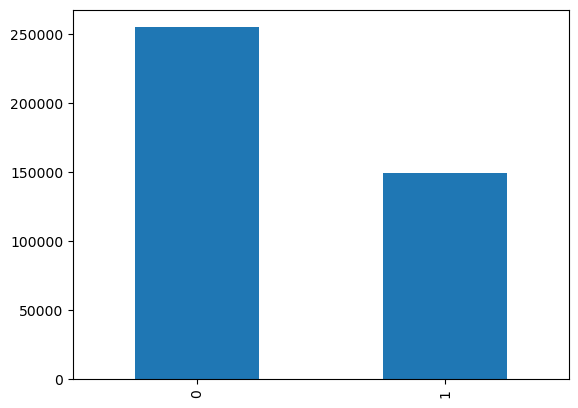

In [22]:
# Distribution of duplicate question pairs
print(df['is_duplicate'].value_counts())
print('\n')
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
print('\n')
df['is_duplicate'].value_counts().plot(kind='bar')

In [43]:
# Repeated Questions

qid=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print('Number of unique questions:', np.unique(qid).shape[0])
x=qid.value_counts()>1
print('Number of repeated questions:', x[x].shape[0])

Number of unique questions: 537933
Number of repeated questions: 111780


In [32]:
qid.value_counts()

2559      157
30782     120
4044      111
2561       88
14376      79
         ... 
416446      1
416444      1
416441      1
416439      1
537933      1
Length: 537933, dtype: int64

In [39]:
x[x==True].shape[0]

111780

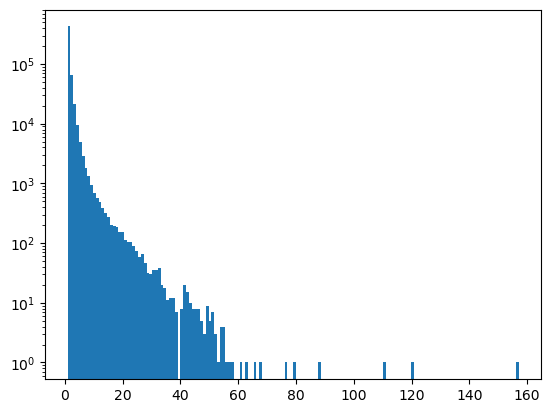

In [51]:
import matplotlib.pyplot as plt
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [46]:
qid.value_counts().values

array([157, 120, 111, ...,   1,   1,   1], dtype=int64)

# Only Bow

In [52]:
df=pd.read_csv("duplicate_questions_pairs.xls - duplicate_questions_pairs.xls.csv")
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [54]:
new_df=df.sample(20000)
new_df.shape

(20000, 6)

In [55]:
df2=new_df[['question1','question2']]
df2.head()

,question1,question2
245837,What was your PAST?,What is past the universe?
248650,How has the Mormon Church been able to remain ...,"If the USA is a secular state, why do the U.S...."
221614,How much money do people make from YouTube vid...,To people who make YouTube videos: how much mo...
49977,How do you know if you should divorce?,When is it time for a divorce?
310242,What are some online part-time jobs that fetch...,What are the best online part-time jobs?


In [56]:
df2.isnull().sum()

question1    0
question2    0
dtype: int64

In [58]:
df2.duplicated().sum()

0

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

questions=df2['question1'].tolist()+df2['question2'].tolist()

cv=CountVectorizer(max_features=2000)

model=cv.fit_transform(questions).toarray()

split_index=len(df2['question1'])
assert model.shape[0]==2*split_index

q1_arr, q2_arr=np.vsplit(model,[split_index])

In [78]:
temp_df1 = pd.DataFrame(q1_arr, index= df2.index)
temp_df2 = pd.DataFrame(q2_arr, index= df2.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(20000, 4000)

In [79]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
245837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248650,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
221614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,0,0
49977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
310242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
236386,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
379228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
231508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [80]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [81]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,is_duplicate
245837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248650,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
221614,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,0,0
49977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
310242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.72625

In [87]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/5e/03/15cd49e855c62226ecf1831bbe4c8e73a4324856077a23c495538a36e557/xgboost-3.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB 7.0 MB/s eta 0:00:22
   ---------------------------------------- 0.5/150.0 MB 8.3 MB/s eta 0:00:19
   ---------------------------------------- 0.8/150.0 MB 5.9 MB/s eta 0:00:26
   ---------------------------------------- 1.1/150.0 MB 5.6 MB/s eta 0:00:27
   ---------------------------------------- 1.3/150.0 MB 5.8 MB/s eta 0:00:26
   ---------------------------------------- 1.5/150.0 MB 5.7 MB/s eta 0:00:26
   ---------------------------------------- 1.7/150.0 MB 5.4 MB/s eta 0:00:28
    --------------------------------------- 1.9/150.0 MB 5.2 MB/s eta 0:00:29
    --------------------------------------- 2.1/150.0 MB 5.2 MB/s eta 0:00:29
    -----------------

In [88]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.713